# MODEL IMPLEMENTATION

## Importing Libraries

In [185]:
#Data Processing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np

from sklearn.model_selection import train_test_split

#Metrics and Reports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report

#Importing all Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [92]:
## OVERSAMPLED DATA
data_smt=pd.read_csv(r"C:\Users\Komal\Documents\venv_\data_smt.csv")
data_smt 

,Unnamed: 0,hour_inst,0,amt_std,orig_oldBal_std,dest_newBal_std,isFlaggedFraud,origName_num,destName_num,isFraud
0,0,1,0.000000,-0.357467,-0.188847,-0.438259,0,1.305486e+09,5.532641e+08,1
1,1,1,1.000000,-0.357467,-0.188847,-0.438259,0,8.400837e+08,3.899701e+07,1
2,2,1,1.000000,-0.099576,-0.128591,-0.427245,0,9.050804e+08,4.764022e+08,0
3,3,1,0.000000,-0.115146,-0.186762,-0.438259,0,1.670993e+09,1.100439e+09,0
4,4,1,0.000000,-0.006590,-0.146456,0.143134,0,1.984094e+09,9.325838e+08,0
...,...,...,...,...,...,...,...,...,...,...
5524387,5524387,21,1.000000,2.209439,8.878579,0.194944,0,1.674460e+09,5.521628e+08,1
5524388,5524388,21,0.784301,0.132743,1.542788,-0.356129,0,4.773347e+08,7.193603e+08,1
5524389,5524389,15,0.423610,-0.122661,0.640589,-0.396796,0,6.350794e+08,1.282578e+09,1
5524390,5524390,19,0.049081,1.737213,7.210472,-0.436633,0,1.501832e+09,3.719206e+07,1


<Axes: >

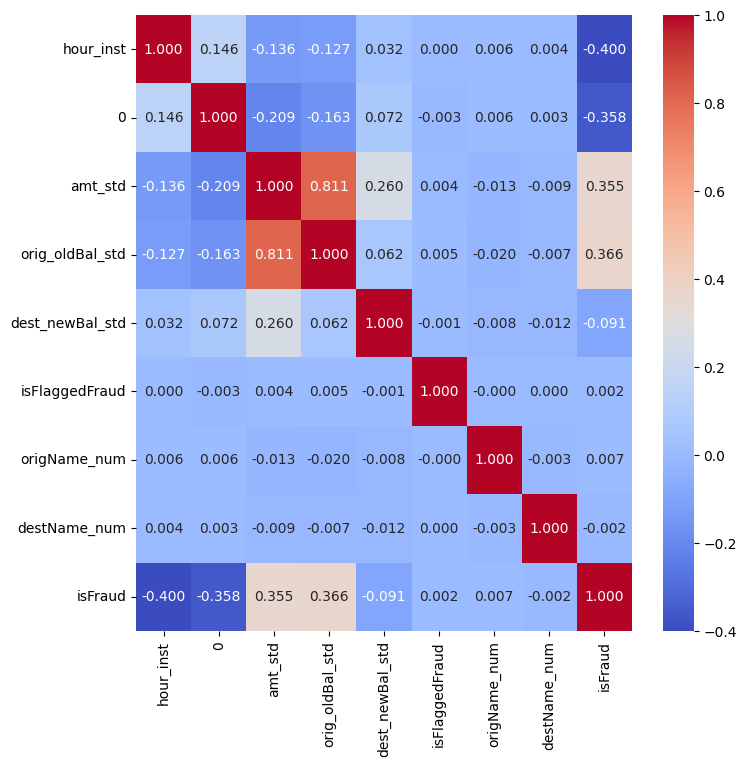

In [67]:
#data_smt=data_smt.drop("Unnamed: 0",axis=1)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data_smt.corr(),annot=True,cmap="coolwarm", fmt=".3f")

In [146]:
#NOT OVERSAMPLED DATA
data_NoOversample=pd.read_csv(r"C:\Users\Komal\Documents\venv_\data_clean_std.csv")
data_NoOversample

,Unnamed: 0,hour_inst,0,isFraud,amt_std,orig_oldBal_std,dest_newBal_std,isFlaggedFraud,origName_num,destName_num
0,2,1,0.0,1,-0.357467,-0.188847,-0.438259,0,1305486145,553264065
1,3,1,1.0,1,-0.357467,-0.188847,-0.438259,0,840083671,38997010
2,15,1,1.0,0,-0.099576,-0.128591,-0.427245,0,905080434,476402209
3,19,1,0.0,0,-0.115146,-0.186762,-0.438259,0,1670993182,1100439041
4,24,1,0.0,0,-0.006590,-0.146456,0.143134,0,1984094095,932583850
...,...,...,...,...,...,...,...,...,...,...
2770404,6362615,23,1.0,1,0.024945,1.161997,-0.365631,0,786484425,776919290
2770405,6362616,23,0.0,1,6.751458,24.922965,-0.438259,0,1529008245,1881841831
2770406,6362617,23,1.0,1,6.751458,24.922965,0.925844,0,1162922333,1365125890
2770407,6362618,23,0.0,1,0.599766,3.192516,-0.438259,0,1685995037,2080388513


<Axes: >

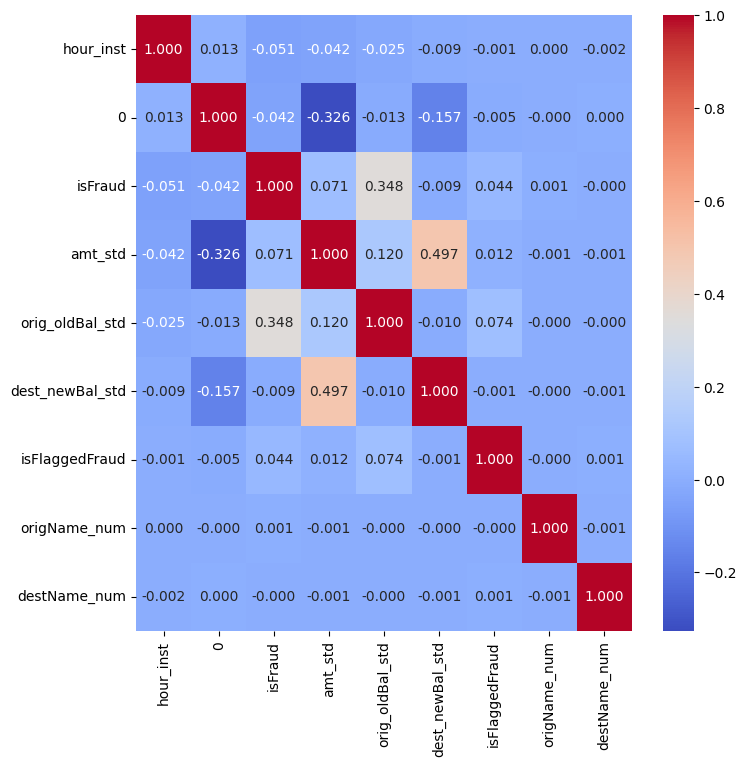

<Axes: >

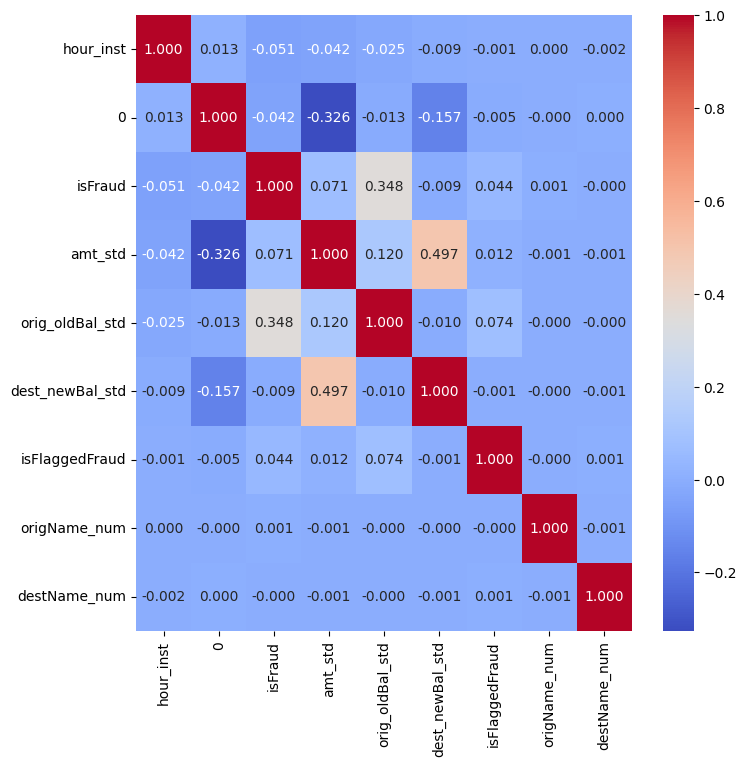

In [42]:
#data_NoOversample=data_NoOversample.drop("Unnamed: 0",axis=1)
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data_NoOversample.corr(),annot=True,cmap="coolwarm", fmt=".3f")

In [127]:
x_T=data_NoOversample.drop(['isFlaggedFraud','hour_inst','isFraud','origName_num','destName_num'],axis=1)
y_T=data_NoOversample[['isFraud']]
#y_T['isFraud'].unique()
pca_T=PCA(n_components=2)
x_T_trans=pca_T.fit_transform(x_T)

In [162]:
x_T=data_NoOversample[data_NoOversample['0']==0].drop(['isFlaggedFraud','hour_inst','isFraud','origName_num','destName_num'],axis=1)
y_T=data_NoOversample[data_NoOversample['0']==0][['isFraud']]
x_C=data_NoOversample[data_NoOversample['0']==1].drop(['isFlaggedFraud','hour_inst','isFraud','origName_num','destName_num'],axis=1)
y_C=data_NoOversample[data_NoOversample['0']==1][['isFraud']]
print(len(x_T),len(y_T))
print(len(x_C),len(y_C))

532909 532909
2237500 2237500


In [142]:
pca_T=PCA(n_components=2)
pca_C=PCA(n_components=2)
x_T_trans=pca_T.fit_transform(x_T)
x_C_trans=pca_C.fit_transform(x_C)

In [143]:
y_T['Transfer_PC1']=x_T_trans[:,0].tolist()
y_T['Transfer_PC2']=x_T_trans[:,1].tolist()
y_C['Cashout_PC1']=x_C_trans[:,0].tolist()
y_C['Cashout_PC2']=x_C_trans[:,1].tolist()

<Axes: xlabel='Transfer_PC1', ylabel='Transfer_PC2'>

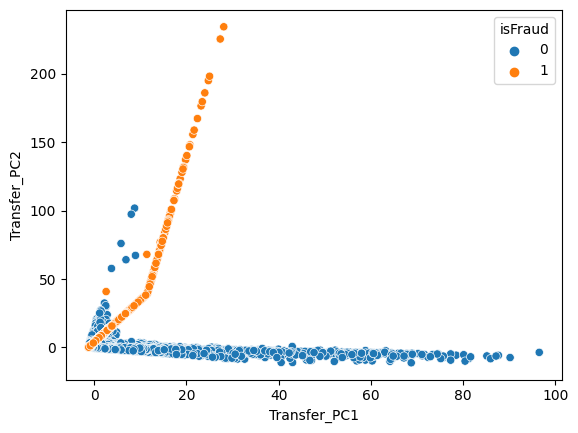

In [145]:
sns.scatterplot(data=y_T,x=y_T['Transfer_PC1'],y=y_T['Transfer_PC2'],hue='isFraud')

<Axes: xlabel='Cashout_PC1', ylabel='Cashout_PC2'>

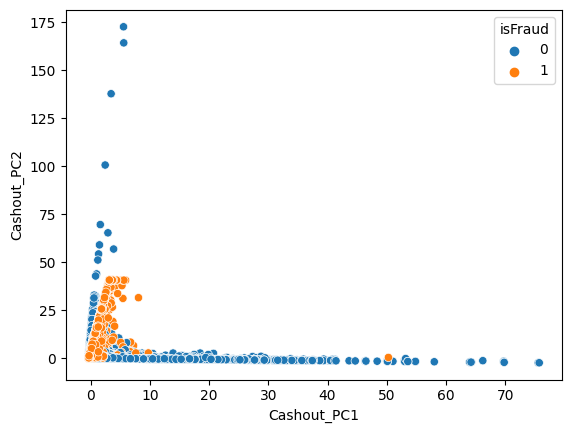

In [144]:
sns.scatterplot(data=y_C,x=y_C['Cashout_PC1'],y=y_C['Cashout_PC2'],hue='isFraud')

# Implementations

# WITH OVERSAMPLING: SMOTE

In [184]:
#Splitting to test and train sets
x_train,x_test,y_train,y_test = train_test_split(data_smt.drop(["isFraud"],axis=1),data_smt["isFraud"],test_size=0.3,shuffle=True,random_state=42,stratify=data_smt["isFraud"])

#Testing on Non-oversampled set
x_dum,x_tstOg,y_dum,y_tstOg = train_test_split(data_NoOversample.drop(["isFraud"],axis=1),data_NoOversample["isFraud"],test_size=0.3,shuffle=True,random_state=42,stratify=data_NoOversample["isFraud"])

## k-Neareast Neighbours

## k=3

In [186]:
#Define
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train, y_train)

In [ ]:
#Predict
y_predKNN3 = knn3.predict(x_test)

Text(0.5, 23.52222222222222, 'Predicted label')

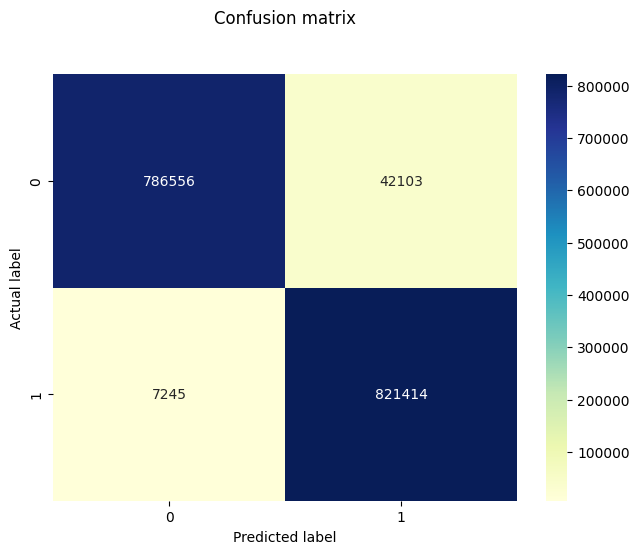

In [187]:
#Confusion Matrix
kNN3_cnfMat = metrics.confusion_matrix(y_test, y_predKNN3)

#Plotting Confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(kNN3_cnfMat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [189]:
#Classification Report
print("Classification report for k=3\n\n")
print(classification_report(y_test, y_predKNN3, target_names=['not Fraud', 'Fraud']))

Classification report for k=3


              precision    recall  f1-score   support

   not Fraud       0.99      0.95      0.97    828659
       Fraud       0.95      0.99      0.97    828659

    accuracy                           0.97   1657318
   macro avg       0.97      0.97      0.97   1657318
weighted avg       0.97      0.97      0.97   1657318



## k=5

In [191]:
#Define
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(x_train, y_train)

In [ ]:
#Predict
y_predKNN5 = knn5.predict(x_test)

Text(0.5, 23.52222222222222, 'Predicted label')

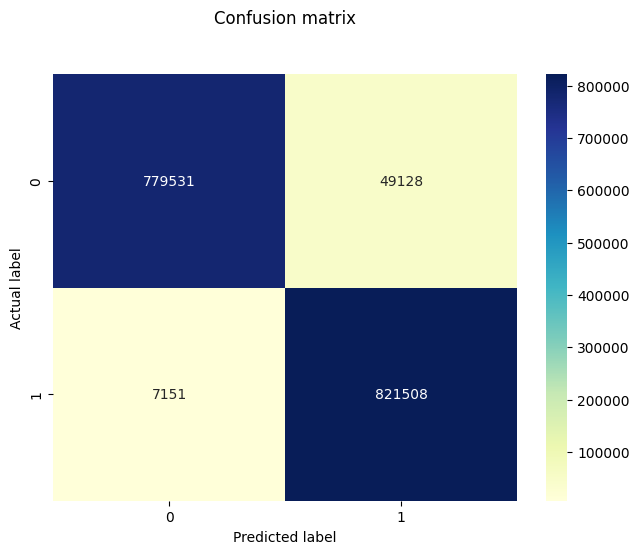

In [192]:
#Confusion Matrix
kNN5_cnfMat = metrics.confusion_matrix(y_test, y_predKNN5)

#Plotting Confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(kNN5_cnfMat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [193]:
#Classification Report
print("Classification report for k=5\n\n")
print(classification_report(y_test, y_predKNN5, target_names=['not Fraud', 'Fraud']))

Classification report for k=5


              precision    recall  f1-score   support

   not Fraud       0.99      0.94      0.97    828659
       Fraud       0.94      0.99      0.97    828659

    accuracy                           0.97   1657318
   macro avg       0.97      0.97      0.97   1657318
weighted avg       0.97      0.97      0.97   1657318



## k=10

In [194]:
#Define
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [195]:
#Predict
y_predKNN10 = knn10.predict(x_test)

Text(0.5, 23.52222222222222, 'Predicted label')

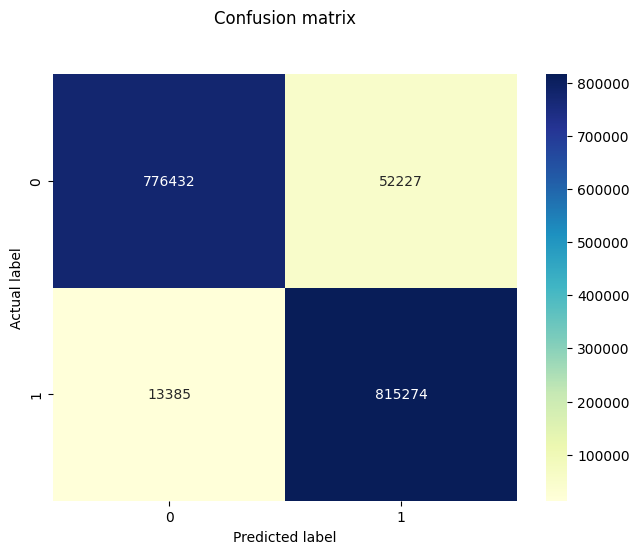

In [196]:
#Confusion Matrix
kNN10_cnfMat = metrics.confusion_matrix(y_test, y_predKNN10)

#Plotting Confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(kNN10_cnfMat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [197]:
#Classification Report
print("Classification report for k=10\n\n")
print(classification_report(y_test, y_predKNN10, target_names=['not Fraud', 'Fraud']))

Classification report for k=10


              precision    recall  f1-score   support

   not Fraud       0.98      0.94      0.96    828659
       Fraud       0.94      0.98      0.96    828659

    accuracy                           0.96   1657318
   macro avg       0.96      0.96      0.96   1657318
weighted avg       0.96      0.96      0.96   1657318



In [199]:
#Plotting ROC curves for all values of k
y_predKNN3_proba = knn3.predict_proba(x_test)[::,1]
y_predKNN5_proba = knn5.predict_proba(x_test)[::,1]
y_predKNN10_proba = knn10.predict_proba(x_test)[::,1]

fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_predKNN3_proba)
fpr5, tpr5, _ = metrics.roc_curve(y_test,  y_predKNN5_proba)
fpr10, tpr10, _ = metrics.roc_curve(y_test,  y_predKNN10_proba)

auc3 = metrics.roc_auc_score(y_test, y_predKNN3_proba)
auc5 = metrics.roc_auc_score(y_test, y_predKNN5_proba)
auc10 = metrics.roc_auc_score(y_test, y_predKNN10_proba)

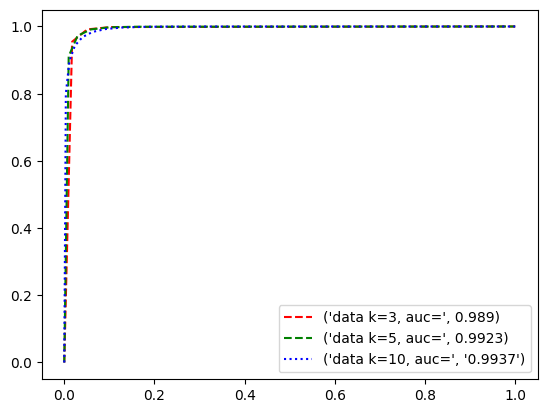

In [221]:
#Figure Show
plt.plot(fpr3,tpr3,linestyle='dashed',color='red',label=("data k=3, auc=",(round(auc3,4))))
plt.plot(fpr5,tpr5,linestyle='dashed',color='green',label=("data k=5, auc=",(round(auc5,4))))
plt.plot(fpr10,tpr10,color='blue',linestyle=':',label=("data k=10, auc=",str(round(auc10,4))))
plt.legend()
plt.show()

In [227]:
y_predKNN3_OG = knn3.predict(x_tstOg)

Text(0.5, 23.52222222222222, 'Predicted label')

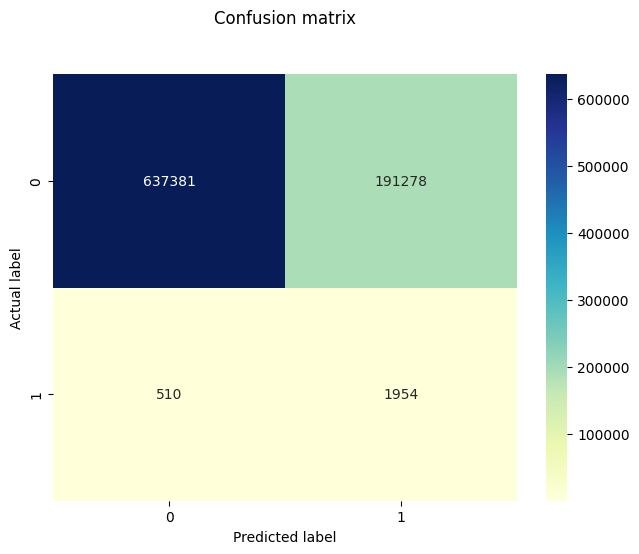

In [228]:
#Confusion Matrix
kNN3_cnfMat_Og = metrics.confusion_matrix(y_tstOg, y_predKNN3_OG)

#Plotting Confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(kNN3_cnfMat_Og), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [229]:
#Classification Report
print("Classification report for k=3 on Original Test data\n\n")
print(classification_report(y_tstOg, y_predKNN3_OG, target_names=['not Fraud', 'Fraud']))

Classification report for k=3 on Original Test data


              precision    recall  f1-score   support

   not Fraud       1.00      0.77      0.87    828659
       Fraud       0.01      0.79      0.02      2464

    accuracy                           0.77    831123
   macro avg       0.50      0.78      0.44    831123
weighted avg       1.00      0.77      0.87    831123



In [230]:
y_predKNN10_OG = knn10.predict(x_tstOg)

Text(0.5, 23.52222222222222, 'Predicted label')

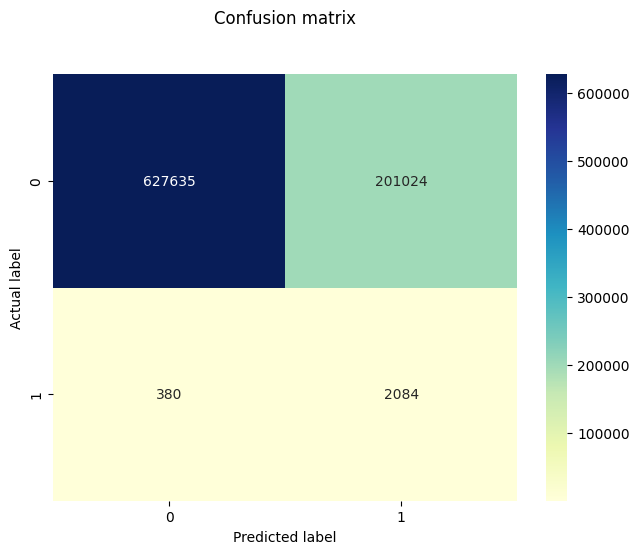

In [231]:
#Confusion Matrix
kNN10_cnfMat_Og = metrics.confusion_matrix(y_tstOg, y_predKNN10_OG)

#Plotting Confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(kNN10_cnfMat_Og), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [232]:
#Classification Report
print("Classification report for k=10 on Original Test data\n\n")
print(classification_report(y_tstOg, y_predKNN10_OG, target_names=['not Fraud', 'Fraud']))

Classification report for k=10 on Original Test data


              precision    recall  f1-score   support

   not Fraud       1.00      0.76      0.86    828659
       Fraud       0.01      0.85      0.02      2464

    accuracy                           0.76    831123
   macro avg       0.50      0.80      0.44    831123
weighted avg       1.00      0.76      0.86    831123



## Decision Tree Classifier

In [233]:
dTree_clf = DecisionTreeClassifier()
dTree_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [234]:
y_predDTree=dTree_clf.predict(x_test)

Text(0.5, 427.9555555555555, 'Predicted label')

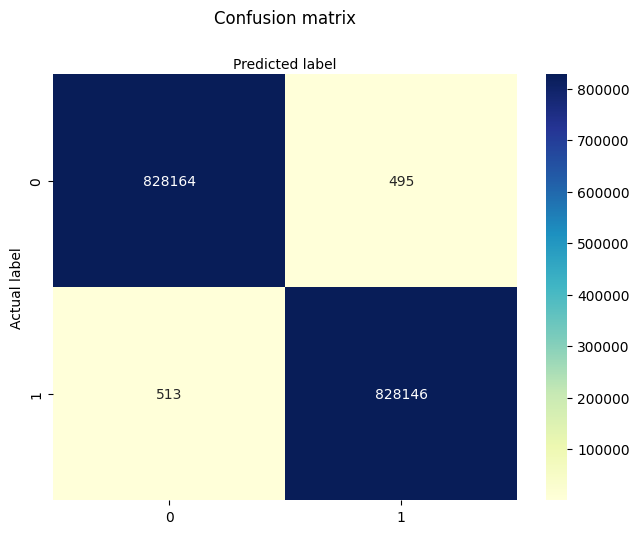

In [235]:
#Confusion Matrix
from sklearn import metrics
# import the metrics class
DTree_cnfMat = metrics.confusion_matrix(y_test, y_predDTree)

# import required modules
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(DTree_cnfMat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

              precision    recall  f1-score   support

   not Fraud       1.00      1.00      1.00    828659
       Fraud       1.00      1.00      1.00    828659

    accuracy                           1.00   1657318
   macro avg       1.00      1.00      1.00   1657318
weighted avg       1.00      1.00      1.00   1657318



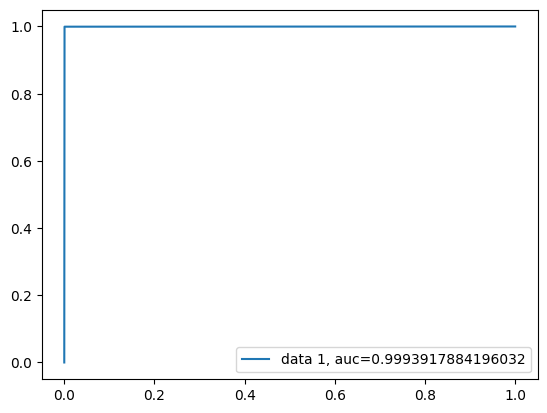

In [236]:
#ROC Curve
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predDTree, target_names=['not Fraud', 'Fraud']))

y_predDTree_proba = dTree_clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_predDTree_proba)
auc = metrics.roc_auc_score(y_test, y_predDTree_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# WITH CLASSIFIERS THAT DO NOT NEED OVERSAMPLING

## DECISION TREE

In [ ]:
#Testing on Non-oversampled set
x_dum,x_tstOg,y_dum,y_tstOg = train_test_split(data_NoOversample.drop(["isFraud"],axis=1),data_NoOversample["isFraud"],test_size=0.3,shuffle=True,random_state=42,stratify=data_NoOversample["isFraud"])

In [242]:
dTree_NO_clf = DecisionTreeClassifier()
dTree_NO_clf.fit(x_dum,y_dum)
## Checking Accuracy on OG Data Test
y_predDTree_NO=dTree_NO_clf.predict(x_tstOg)

Text(0.5, 427.9555555555555, 'Predicted label')

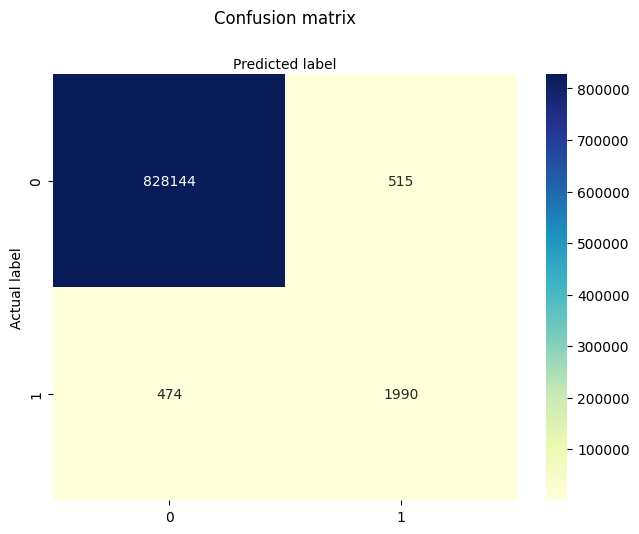

In [243]:
#Confusion Matrix
from sklearn import metrics
# Confusion Matrix
DTreeOG_cnfMat = metrics.confusion_matrix(y_tstOg, y_predDTree_NO)

# import required modules
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(DTreeOG_cnfMat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

              precision    recall  f1-score   support

   not Fraud       1.00      1.00      1.00    828659
       Fraud       0.79      0.81      0.80      2464

    accuracy                           1.00    831123
   macro avg       0.90      0.90      0.90    831123
weighted avg       1.00      1.00      1.00    831123



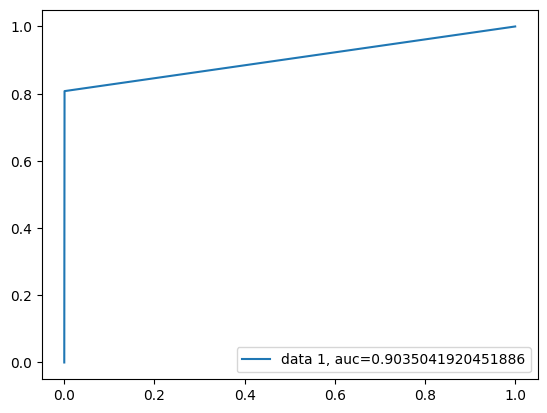

In [246]:
#ROC Curve
print(classification_report(y_tstOg, y_predDTree_NO, target_names=['not Fraud', 'Fraud']))

y_predDTree_NO_proba = dTree_NO_clf.predict_proba(x_tstOg)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_tstOg,  y_predDTree_NO_proba)
auc = metrics.roc_auc_score(y_tstOg, y_predDTree_NO_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##  XG-Boost Classifier

In [258]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from numpy import loadtxt
from xgboost import XGBClassifier

modelXGB = XGBClassifier()
modelXGB.fit(x_dum, y_dum)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [260]:
yPred_XGB = modelXGB.predict(x_tstOg)

In [261]:
print(metrics.classification_report(y_tstOg, yPred_XGB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828659
           1       0.97      0.84      0.90      2464

    accuracy                           1.00    831123
   macro avg       0.99      0.92      0.95    831123
weighted avg       1.00      1.00      1.00    831123



Text(0.5, 427.9555555555555, 'Predicted label')

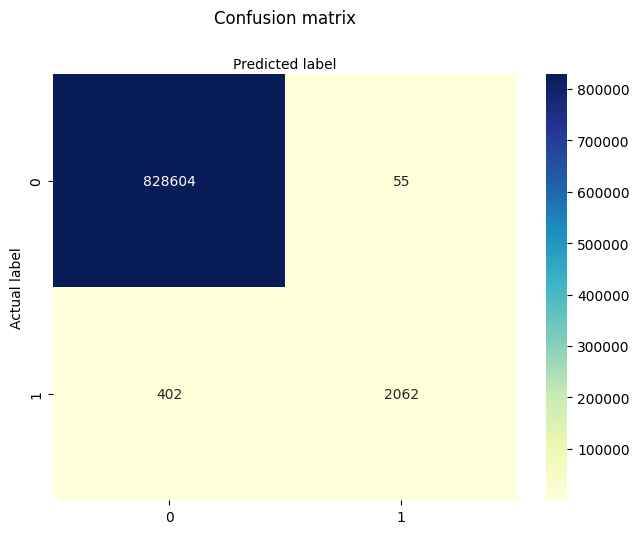

In [262]:
# Confusion Matrix
XGBOG_cnfMat = metrics.confusion_matrix(y_tstOg, yPred_XGB)

# import required modules
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(XGBOG_cnfMat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

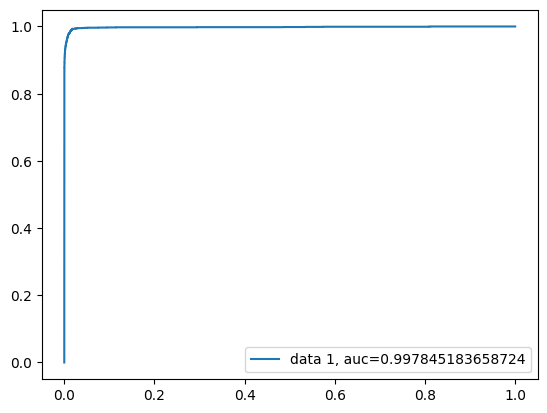

In [264]:
#ROC Curve
y_predXGB_proba = modelXGB.predict_proba(x_tstOg)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_tstOg,  y_predXGB_proba)
auc = metrics.roc_auc_score(y_tstOg, y_predXGB_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()